In [82]:
#limpeza e manipucação de dados
import pandas as pd
import numpy as np

#visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,roc_curve, roc_auc_score

import statsmodels.api as sm
import statsmodels.formula.api as smf



In [83]:
df=pd.read_csv('dummyult.csv')

In [84]:
data=pd.read_csv('ultmatriz.csv')

In [85]:
df.head()

,cliente_id,faixa_etaria,clientes_inadimplentes,idade_dummy,linhas_dummy,salario_dummy,emprestimos_dummy,dependentes_dummy,taxa_dummy,mais90_dias_dummy,score_dummy,classificacao_clientes
0,2989,30-39,0,1,1,1,1,1,1,1,7,mau pagador
1,2085,50-59,1,1,0,1,1,1,1,1,7,mau pagador
2,33560,30-39,0,1,1,1,1,1,1,1,7,mau pagador
3,4803,50-59,0,1,1,1,1,1,1,1,7,mau pagador
4,35602,40-49,0,1,1,1,1,1,1,1,7,mau pagador


In [86]:
df.dtypes

cliente_id                 int64
faixa_etaria              object
clientes_inadimplentes     int64
idade_dummy                int64
linhas_dummy               int64
salario_dummy              int64
emprestimos_dummy          int64
dependentes_dummy          int64
taxa_dummy                 int64
mais90_dias_dummy          int64
score_dummy                int64
classificacao_clientes    object
dtype: object

In [87]:
#resumo geral do dataframe
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35575 entries, 0 to 35574
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   cliente_id              35575 non-null  int64 
 1   faixa_etaria            35575 non-null  object
 2   clientes_inadimplentes  35575 non-null  int64 
 3   idade_dummy             35575 non-null  int64 
 4   linhas_dummy            35575 non-null  int64 
 5   salario_dummy           35575 non-null  int64 
 6   emprestimos_dummy       35575 non-null  int64 
 7   dependentes_dummy       35575 non-null  int64 
 8   taxa_dummy              35575 non-null  int64 
 9   mais90_dias_dummy       35575 non-null  int64 
 10  score_dummy             35575 non-null  int64 
 11  classificacao_clientes  35575 non-null  object
dtypes: int64(10), object(2)
memory usage: 3.3+ MB


Sem valores ausentes

In [88]:
# Dividindo os dados em conjuntos de treinando e teste
X = df.drop(['classificacao_clientes'], axis = 1) #caracteristicas = variaveis
y = df['classificacao_clientes'] #alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#treino: 70% e teste:30%

In [89]:
X_test

,cliente_id,faixa_etaria,clientes_inadimplentes,idade_dummy,linhas_dummy,salario_dummy,emprestimos_dummy,dependentes_dummy,taxa_dummy,mais90_dias_dummy,score_dummy
22879,31987,50-59,0,0,1,1,1,0,1,0,4
16801,10609,30-39,0,1,0,1,1,0,0,0,3
25700,3953,30-39,0,1,1,1,0,0,1,0,4
8193,33311,60-69,0,0,0,1,1,0,0,0,2
18837,20393,40-49,0,1,1,0,1,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
461,453,60-69,0,0,0,0,0,0,0,0,0
2705,30107,50-59,0,0,0,0,0,1,0,0,1
29460,6522,40-49,0,1,0,1,1,0,0,1,4
22215,31333,60-69,0,0,1,1,0,0,1,0,3


In [90]:
# Criando uma string para a formula
cols = df.columns.drop('classificacao_clientes')
formula = 'classificacao_clientes ~ ' + ' + '.join(cols)
print(formula, '\n')

classificacao_clientes ~ cliente_id + faixa_etaria + clientes_inadimplentes + idade_dummy + linhas_dummy + salario_dummy + emprestimos_dummy + dependentes_dummy + taxa_dummy + mais90_dias_dummy + score_dummy 



In [91]:

# Executando o modelo e relatando os resultados#
model = smf.glm(formula=formula, data=X_train.join(y_train), family=sm.families.Binomial())
logistic_fit = model.fit()

print(logistic_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


                                               Generalized Linear Model Regression Results                                                
Dep. Variable:     ['classificacao_clientes[bom pagador]', 'classificacao_clientes[mau pagador]']   No. Observations:                24902
Model:                                                                                        GLM   Df Residuals:                    24885
Model Family:                                                                            Binomial   Df Model:                           16
Link Function:                                                                              Logit   Scale:                          1.0000
Method:                                                                                      IRLS   Log-Likelihood:            -1.4676e-09
Date:                                                                            Thu, 23 May 2024   Deviance:                   2.9353e-09
Time:                      

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


In [92]:
# Obter os coeficientes do modelo
coef = logistic_fit.params

# Exibir os coeficientes e suas respectivas variáveis
print("\nCoeficientes do Modelo:")
print(coef)

# Exibir a importância das variáveis
importance = abs(coef).sort_values(ascending=False)
print("\nImportância das Variáveis (absoluta):")
print(importance)



Coeficientes do Modelo:
Intercept                 263.753623
faixa_etaria[T.30-39]       0.058370
faixa_etaria[T.40-49]       0.062909
faixa_etaria[T.50-59]       0.050140
faixa_etaria[T.60-69]       0.109215
faixa_etaria[T.70-79]       0.251141
faixa_etaria[T.80-89]       0.310041
faixa_etaria[T.90+]         0.281651
cliente_id                 -0.000001
clientes_inadimplentes     -6.706169
idade_dummy                -6.362816
linhas_dummy               -6.541975
salario_dummy              -6.414093
emprestimos_dummy          -6.330591
dependentes_dummy          -6.561055
taxa_dummy                 -6.544572
mais90_dias_dummy          -6.655279
score_dummy               -52.116549
dtype: float64

Importância das Variáveis (absoluta):
Intercept                 263.753623
score_dummy                52.116549
clientes_inadimplentes      6.706169
mais90_dias_dummy           6.655279
dependentes_dummy           6.561055
taxa_dummy                  6.544572
linhas_dummy                6.541

In [93]:


# Separar os dados em variáveis independentes (X) e variável dependente (y)
X = df.drop(['classificacao_clientes'], axis=1)  # features
y = df['classificacao_clientes']  # target

# Verificar e converter variáveis categóricas em variáveis numéricas
X = pd.get_dummies(X, drop_first=True)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e ajustar o modelo de Regressão Logística
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Prever os valores no conjunto de teste
y_pred = logistic_model.predict(X_test)

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Calcular outras métricas de avaliação
acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred, pos_label='mau pagador')
recall = recall_score(y_test, y_pred, pos_label='mau pagador')
f1 = f1_score(y_test, y_pred, pos_label='mau pagador')

# Mostrar a matriz de confusão
print("\033[1mMatriz de Confusão:\033[0m")
print(cm)

# Mostrar as métricas de avaliação
print("\n\033[1mMétricas de Avaliação:\033[0m")
print(f"Acurácia: {acuracia:.3f}")
print(f"Precisão: {precisao:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Matriz de Confusão:
[[9168   16]
 [  35 1454]]

Métricas de Avaliação:
Acurácia: 0.995
Precisão: 0.989
Recall: 0.976
F1-score: 0.983


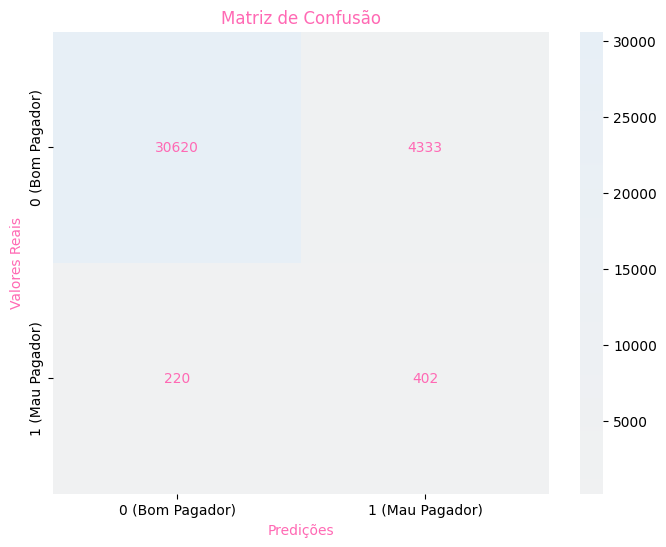

Matriz de Confusão:
[[30620  4333]
 [  220   402]]

Métricas de Avaliação:
Acurácia: 0.872
Acurácia Balanceada: 0.761
Precisão: 0.085
Recall: 0.646
F1-score: 0.150


In [102]:

# Converter a classificação para valores binários
df['classificacao_binaria'] = df['classificacao_clientes'].map({'bom pagador': 0, 'mau pagador': 1})

# Obtendo as etiquetas verdadeiras e preditas
y_true = df['clientes_inadimplentes']
y_pred = df['classificacao_binaria']

# Calcular a matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Calcular métricas de avaliação
acuracia = accuracy_score(y_true, y_pred)
acuracia_balanceada = balanced_accuracy_score(y_true, y_pred)
precisao = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Definindo as cores
cor_barra = "#e7eff6"
cor_texto = "#ff69b4"

# Visualização gráfica da matriz
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=sns.light_palette(cor_barra, as_cmap=True),
            annot_kws={"color": cor_texto}, xticklabels=['0 (Bom Pagador)', '1 (Mau Pagador)'],
            yticklabels=['0 (Bom Pagador)', '1 (Mau Pagador)'])
plt.xlabel('Predições', color=cor_texto)
plt.ylabel('Valores Reais', color=cor_texto)
plt.title('Matriz de Confusão', color=cor_texto)
plt.show()

# Mostrar a Matriz de Confusão
print("\033[1mMatriz de Confusão:\033[0m")
print(cm)

# Mostrar as Métricas de Avaliação
print("\n\033[1mMétricas de Avaliação:\033[0m")
print(f"Acurácia: {acuracia:.3f}")
print(f"Acurácia Balanceada: {acuracia_balanceada:.3f}")
print(f"Precisão: {precisao:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")


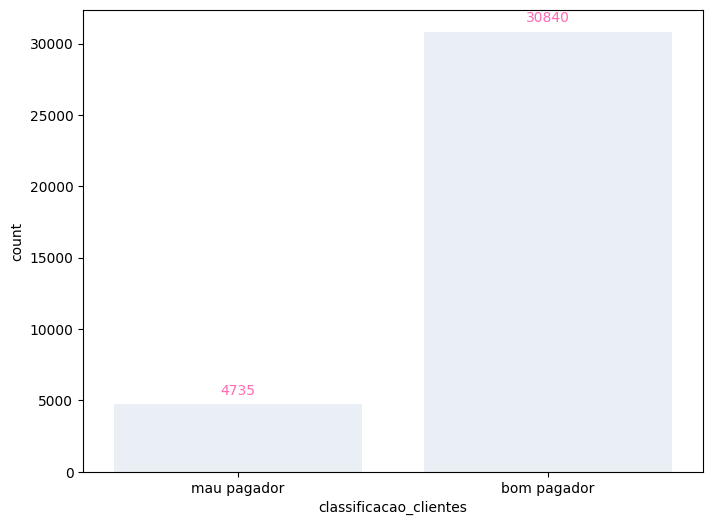

In [103]:

# Definindo as cores
cor_barra = "#e7eff6"
cor_texto = "#ff69b4"

# Visualizar a distribuição das classes
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=df['classificacao_clientes'], color=cor_barra)

# Adicionar números de contagem acima de cada barra com a cor especificada
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                color=cor_texto)

plt.show()




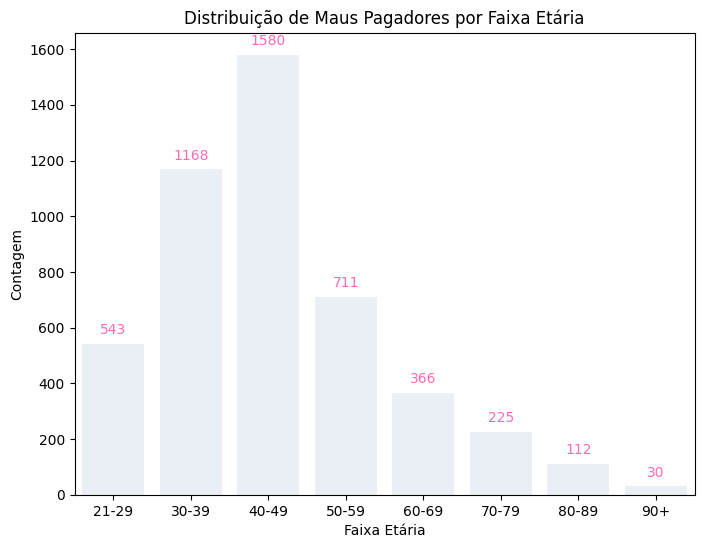

In [104]:


# Definindo as cores
cor_barra = "#e7eff6"
cor_texto = "#ff69b4"

# Filtrar o DataFrame para incluir apenas as entradas correspondentes aos maus pagadores
df_maus_pagadores = df[df['classificacao_clientes'] == 'mau pagador']

# Renomear a coluna 'quartis_faixa_etaria' para 'faixa_etaria'
df_maus_pagadores = df_maus_pagadores.rename(columns={'quartis_faixa_etaria': 'faixa_etaria'})

# Ordenar os dados por faixa etária
df_maus_pagadores_sorted = df_maus_pagadores.sort_values(by='faixa_etaria')

# Visualizar a distribuição dos maus pagadores por faixa etária
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=df_maus_pagadores_sorted['faixa_etaria'], color=cor_barra)

# Adicionar números de contagem acima de cada barra com a cor especificada
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                color=cor_texto)

plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.title('Distribuição de Maus Pagadores por Faixa Etária')
plt.show()


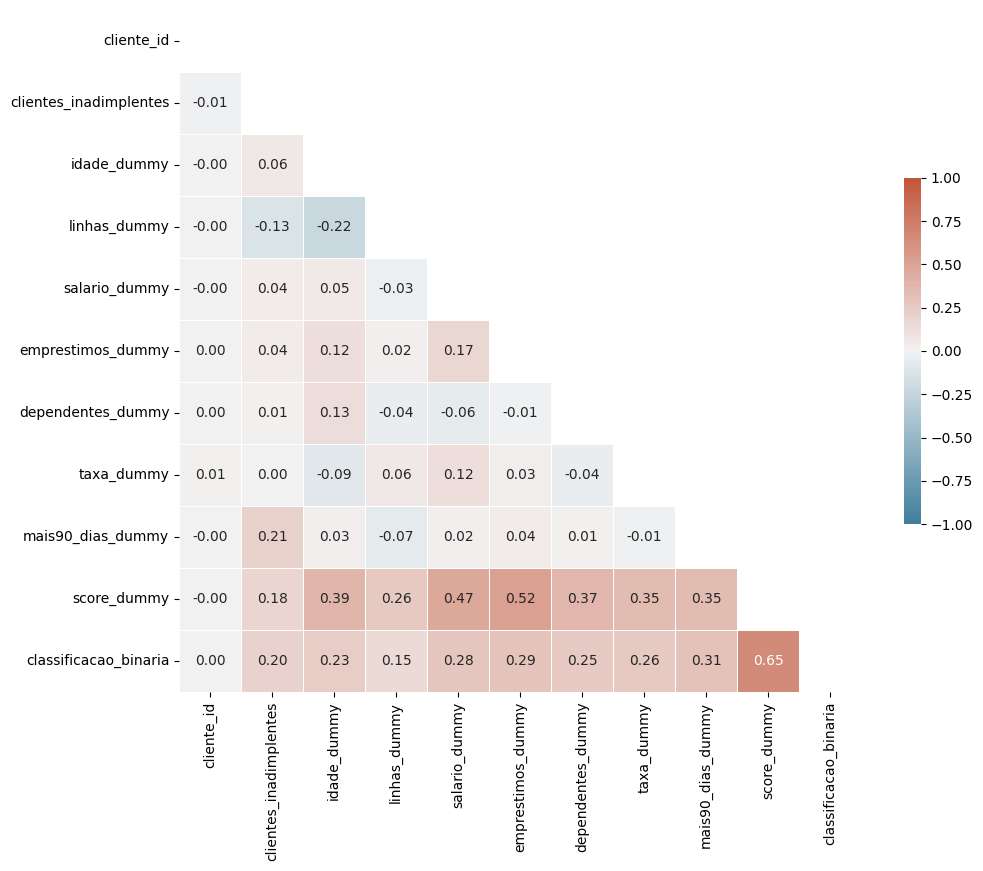

In [105]:


# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Generate and visualize the correlation matrix
corr = numeric_df.corr().round(2)

# Code to remove the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio, and annotate the values
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

plt.show()


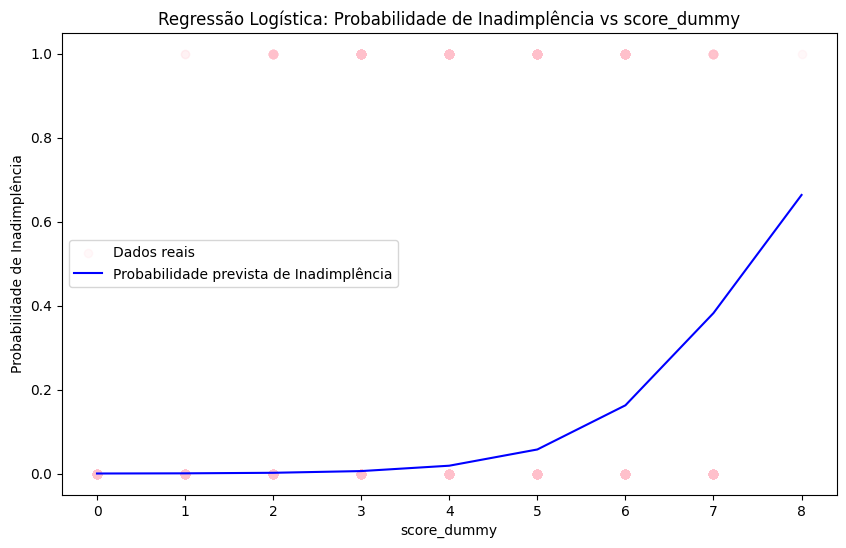

In [106]:


# Supondo que você já tenha seus dados carregados no DataFrame df

# Criando e ajustando o modelo de regressão logística
logistic_model = LogisticRegression()
logistic_model.fit(df[['score_dummy']], df['clientes_inadimplentes'])

# Calculando as probabilidades previstas para os valores existentes em "score_dummy"
probabilities = logistic_model.predict_proba(df[['score_dummy']])[:, 1]

# Graficando
plt.figure(figsize=(10, 6))

# Pontos de dados reais
plt.scatter(df['score_dummy'], df['clientes_inadimplentes'], alpha=0.1, color='pink', label='Dados reais')

# Curva de probabilidade da regressão logística
# Ordenando os valores para uma curva suave
sorted_indices = np.argsort(df['score_dummy'])
sorted_score_dummy = df['score_dummy'].iloc[sorted_indices]
sorted_probabilities = probabilities[sorted_indices]
plt.plot(sorted_score_dummy, sorted_probabilities, color='blue', label='Probabilidade prevista de Inadimplência')

# Títulos e rótulos
plt.title('Regressão Logística: Probabilidade de Inadimplência vs score_dummy')
plt.xlabel('score_dummy')
plt.ylabel('Probabilidade de Inadimplência')
plt.legend()

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


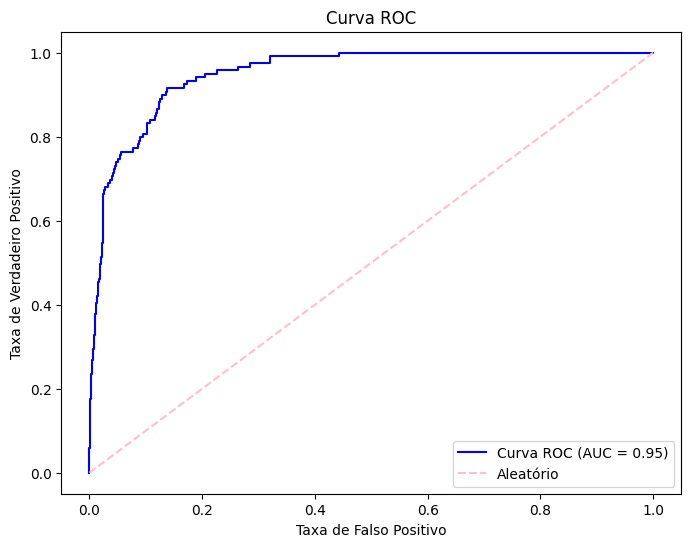

Área Sob a Curva (AUC): 0.9502200537161691


In [107]:


# Selecionar apenas as colunas numéricas
numeric_df = df.select_dtypes(include=[np.number])

# Selecionar apenas as colunas categóricas
categorical_df = df.select_dtypes(include=['object'])

# Aplicar codificação One-Hot Encoding nas colunas categóricas
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical = encoder.fit_transform(categorical_df)

# Obter os nomes das colunas codificadas
encoded_columns = encoder.get_feature_names_out(categorical_df.columns)

# Criar um DataFrame com os dados codificados
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoded_columns)

# Combinar os dataframes numéricos e codificados
processed_df = pd.concat([numeric_df, encoded_categorical_df], axis=1)

# Separar os dados em variáveis independentes (X) e variável dependente (y)
X = processed_df.drop(columns=['clientes_inadimplentes'])  # Features
y = processed_df['clientes_inadimplentes']  # Target

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e ajustar o modelo de regressão logística
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Calcular as probabilidades previstas pelo modelo de regressão logística
probabilities = logistic_model.predict_proba(X_test)[:, 1]

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

# Calcular a área sob a curva ROC (AUC)
auc = roc_auc_score(y_test, probabilities)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='pink', linestyle='--', label='Aleatório')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend()
plt.show()

print("Área Sob a Curva (AUC):", auc)

